In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [2]:
df = pd.read_csv('E:/Study/NLTK/Spam-NotSpam/SMSSpamCollection',sep='\t',names = ['label','message'])

In [3]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text(0.5, 1.0, 'Number of ham and spam messages')

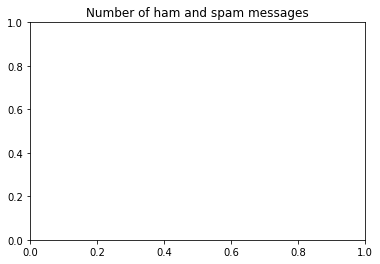

In [4]:


plt.title('Number of ham and spam messages')

In [5]:
X = df.message
Y = df.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)


In [6]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [13]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [29]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1',activation = 'relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer',activation = 'sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [30]:
model = RNN()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 150)               0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
Total params: 96,337
Trainable params: 96,337
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [33]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])
#A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.

Train on 3788 samples, validate on 948 samples
Epoch 1/10
3788/3788 [==============================] - 63s 17ms/step - loss: 0.0321 - acc: 0.9894 - val_loss: 0.0453 - val_acc: 0.9884
Epoch 2/10
3788/3788 [==============================] - 53s 14ms/step - loss: 0.0271 - acc: 0.9916 - val_loss: 0.0433 - val_acc: 0.9905
Epoch 3/10
3788/3788 [==============================] - 49s 13ms/step - loss: 0.0206 - acc: 0.9923 - val_loss: 0.0510 - val_acc: 0.9884


In [34]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [35]:
accr = model.evaluate(test_sequences_matrix,Y_test)

836/836 [==============================] - 7s 9ms/step


In [36]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.066
  Accuracy: 0.986


In [80]:
# Make Prediction
a= 'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T'
answer_sequences = tok.texts_to_sequences(pd.Series(a))
padded_answer_sequence = sequence.pad_sequences(answer_sequences,maxlen=max_len)
if(model.predict(padded_answer_sequence)[0][0] > 0.5):
    print(1)
else:
    print(0)

1


In [67]:
df.iloc[0]['message']


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [79]:
df[df['label'] == 'spam'].iloc[0,1]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [27]:
sequences_matrix

array([[  0,   0,   0, ...,  37,  23,  87],
       [  0,   0,   0, ..., 372,  10,  87],
       [  0,   0,   0, ..., 362,  94, 272],
       ...,
       [  0,   0,   0, ..., 281,  52, 120],
       [  0,   0,   0, ...,  86, 985,   5],
       [  0,   0,   0, ...,   2, 977, 133]])

In [22]:
sequences_matr

numpy.ndarray

In [8]:
type(X_train)

pandas.core.series.Series

In [9]:
X_train

5418    So how are you really. What are you up to. How...
3613    K, my roommate also wants a dubsack and anothe...
1362    Shuhui say change 2 suntec steamboat? U noe wh...
410     Message:some text missing* Sender:Name Missing...
2633                       I WILL CAL YOU SIR. In meeting
1796    I hope your alright babe? I worry that you mig...
4110                     I want to lick your pussy now...
3513                        Already one guy loving you:-.
1854    I just made some payments so dont have that mu...
3811                  Aight, can you text me the address?
3380                      Dear umma she called me now :-)
3974                        Night night, see you tomorrow
3531    Tyler (getting an 8th) has to leave not long a...
961                    U sure u can't take any sick time?
608     what I meant to say is cant wait to see u agai...
3734                Old Orchard near univ. How about you?
3565      Do you always celebrate NY's with your family ?
2788    Forgot